In [639]:
# !mkdir -p ~/.kaggle
# !mv kaggle.json ~/.kaggle/


In [640]:
# copy api command and paste it by clicking three dot's in kaggle dataset
# !kaggle datasets download -d manishkc06/mobile-price-prediction
# !unzip mobile-price-prediction.zip

In [641]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [642]:
df = pd.read_csv('/content/mobile_price_data.csv')

In [643]:
df.head(1)

,mobile_name,mobile_price,mobile_color,dual_sim,disp_size,resolution,os,num_cores,mp_speed,int_memory,ram,p_cam,f_cam,network,bluetooth,battery_power,mob_width,mob_height,mob_depth,mob_weight
0,"Realme Narzo 10A (So White, 32 GB)","₹8,999",So White,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,32 GB,3 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g


In [644]:
df.drop('mobile_name',axis=1,inplace=True)

In [645]:
df.head(1)

,mobile_price,mobile_color,dual_sim,disp_size,resolution,os,num_cores,mp_speed,int_memory,ram,p_cam,f_cam,network,bluetooth,battery_power,mob_width,mob_height,mob_depth,mob_weight
0,"₹8,999",So White,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,32 GB,3 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g


In [646]:
df[df.duplicated()].shape

(55, 19)

In [647]:
df = df.drop_duplicates()

In [648]:
df.shape

(404, 19)

In [649]:
df.isnull().sum()

mobile_price     0
mobile_color     0
dual_sim         0
disp_size        0
resolution       0
os               0
num_cores        0
mp_speed         0
int_memory       0
ram              0
p_cam            0
f_cam            0
network          0
bluetooth        0
battery_power    0
mob_width        0
mob_height       0
mob_depth        0
mob_weight       0
dtype: int64

In [650]:
df.head(1)

,mobile_price,mobile_color,dual_sim,disp_size,resolution,os,num_cores,mp_speed,int_memory,ram,p_cam,f_cam,network,bluetooth,battery_power,mob_width,mob_height,mob_depth,mob_weight
0,"₹8,999",So White,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,32 GB,3 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g


In [651]:
def remove_pricetag(text):
  return text[1:].replace(',', '')

In [652]:
df['mobile_price'] = df['mobile_price'].apply(remove_pricetag)

<ipython-input-652-db28219da68a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mobile_price'] = df['mobile_price'].apply(remove_pricetag)


In [653]:
df['mobile_price'] = df['mobile_price'].astype('int32')

<ipython-input-653-b252574c1f69>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mobile_price'] = df['mobile_price'].astype('int32')


<ipython-input-654-929c032294bd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['mobile_price'])


<Axes: xlabel='mobile_price', ylabel='Density'>

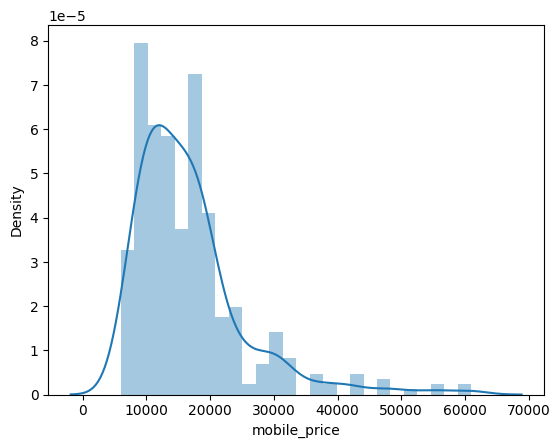

In [654]:
sns.distplot(df['mobile_price'])

In [655]:
df['mobile_color'].nunique()

165

In [656]:
df['mobile_color'].value_counts()

Black            24
Gold             16
Red              13
Blue             12
Rose Gold         9
                 ..
Metallic gold     1
Prism Black       1
Prism Blue        1
Raven Black       1
Red Brick         1
Name: mobile_color, Length: 165, dtype: int64

In [657]:
def color_category(text):
    if 'Black' in text:
        return 'Black'
    elif 'Gold' in text:
        return 'Gold'
    elif 'Red' in text:
        return 'Red'
    elif 'Blue' in text:
        return 'Blue'
    else:
        return 'Other'

In [658]:
df['mobile_color'] = df['mobile_color'].apply(lambda x: color_category(x))

<Axes: >

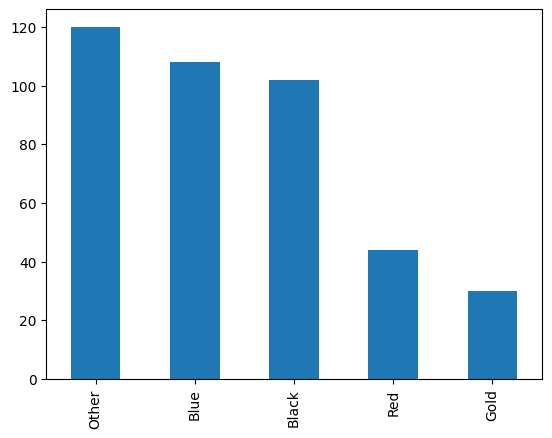

In [659]:
df['mobile_color'].value_counts().plot(kind='bar')

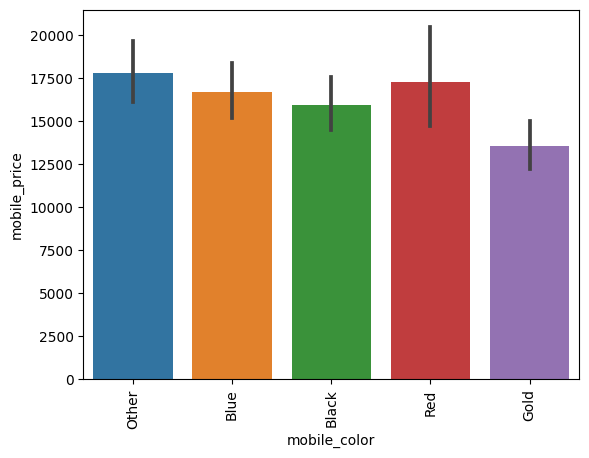

In [660]:
sns.barplot(x=df['mobile_color'],y=df['mobile_price'])
plt.xticks(rotation='vertical')
plt.show()

In [661]:
df.head(1)

,mobile_price,mobile_color,dual_sim,disp_size,resolution,os,num_cores,mp_speed,int_memory,ram,p_cam,f_cam,network,bluetooth,battery_power,mob_width,mob_height,mob_depth,mob_weight
0,8999,Other,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,32 GB,3 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g


In [662]:
df['dual_sim'].value_counts()

Dual Sim      403
Single Sim      1
Name: dual_sim, dtype: int64

In [663]:
df = df[df['dual_sim'] != 'Single Sim']

In [664]:
df['dual_sim'].value_counts()

Dual Sim    403
Name: dual_sim, dtype: int64

In [665]:
def display_preprocess(text):
  return text.split()[2].replace("(",'')

In [666]:
# for i in range(35):
#   print(df['disp_size'].value_counts().index[i].split()[2].replace("(",''))


In [667]:
# df['disp_size'].value_counts()

In [668]:
df['disp_size'] = df['disp_size'].apply(lambda x:display_preprocess(x))
# df['mobile_color'] = df['mobile_color'].apply(lambda x: color_category(x))

<ipython-input-668-3ee09410eafe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['disp_size'] = df['disp_size'].apply(lambda x:display_preprocess(x))


In [669]:
# df['disp_size'].value_counts()

<Axes: xlabel='disp_size', ylabel='mobile_price'>

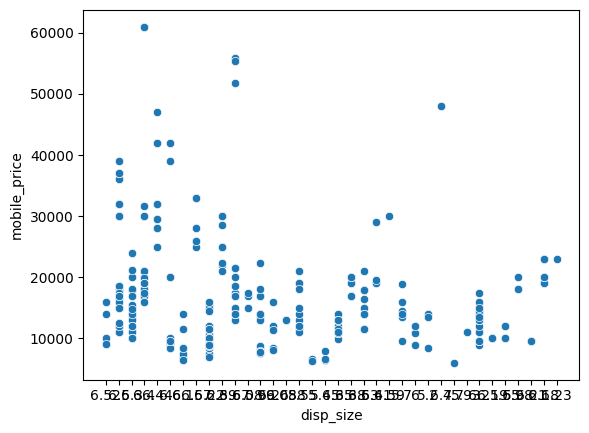

In [670]:
sns.scatterplot(x=df['disp_size'],y=df['mobile_price'])

In [671]:
df.head(1)

,mobile_price,mobile_color,dual_sim,disp_size,resolution,os,num_cores,mp_speed,int_memory,ram,p_cam,f_cam,network,bluetooth,battery_power,mob_width,mob_height,mob_depth,mob_weight
0,8999,Other,Dual Sim,6.52,1600 x 720 Pixels,Android 10,Octa Core,2 GHz,32 GB,3 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g


In [672]:
df['resolution'].value_counts()

2340 x 1080 pixels     59
2400 x 1080 Pixels     43
1520 x 720 pixels      32
1600 x 720 Pixels      25
1080 x 2340 Pixels     19
1520 x 720 Pixels      19
2160 x 1080 pixels     14
2160 x 1080 Pixels     13
1440 x 720 pixels      12
720 x 1600 Pixels      12
2340 x 1080 Pixels     12
1440 x 720 Pixels      11
2400 × 1080 Pixels     11
1280 x 720 Pixels       9
720 x 1544 Pixels       8
1080 x 2160 pixels      7
1560 x 720 pixels       7
2280 x 1080 pixels      7
2400 x 1080 pixel       6
1560 x 720 Pixels       6
1520 x 720$$pixel       5
1080 x 2400 Pixels      5
2280 x 1080$$Pixels     5
1500 x 720 pixels       5
1520 x 720$$Pixels      4
2280 x 1080 Pixels      4
1080 x 2340 pixels      4
720 x 1544 pixels       3
2340 x 1080 Pixel       3
1920 x 1080 pixels      3
720 x 1520 pixels       3
1080 x 1920 Pixels      3
720*1440 Pixels         3
720 x 1440 Pixels       3
1280 x 720 pixels       2
2400 x 1080 Pixel       2
2340 x 1080$$pixel      2
2340 x 1080$$Pixel      2
720 x 1560 p

In [673]:
df['resolution']=df['resolution'].replace('\s?[pP]ixel.*','',regex=True).replace('\s?[x*×]\s?','X',regex=True).replace('\$','',regex=True)
df['resolution'].unique()

array(['1600X720', '2340X1080', '2400X1080', '1080X2340', '1080X2400',
       '720X1600', '1560X720', '1520X720', '2160X1080', '1440X720',
       '2280X1080', '1920X1080', '1280X720', '720X1544', '2316X1080',
       '960X540', '540X960', '1080X2160', '1500X720', '720X1440',
       '1080X1920', '720X1520', '720X1560', '720X1280'], dtype=object)

In [674]:
df[['res_dim_1','sep','res_dim_2']]=df['resolution'].str.partition('X')

In [675]:
df.drop('sep',axis=1,inplace=True)

In [676]:
df['res_dim_1']=df['res_dim_1'].astype(int)
df['res_dim_2']=df['res_dim_2'].astype(int)

In [677]:
df['disp_size']=df['disp_size'].astype('float32')

In [678]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403 entries, 0 to 447
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mobile_price   403 non-null    int32  
 1   mobile_color   403 non-null    object 
 2   dual_sim       403 non-null    object 
 3   disp_size      403 non-null    float32
 4   resolution     403 non-null    object 
 5   os             403 non-null    object 
 6   num_cores      403 non-null    object 
 7   mp_speed       403 non-null    object 
 8   int_memory     403 non-null    object 
 9   ram            403 non-null    object 
 10  p_cam          403 non-null    object 
 11  f_cam          403 non-null    object 
 12  network        403 non-null    object 
 13  bluetooth      403 non-null    object 
 14  battery_power  403 non-null    object 
 15  mob_width      403 non-null    object 
 16  mob_height     403 non-null    object 
 17  mob_depth      403 non-null    object 
 18  mob_weight

In [679]:
df.drop('resolution',axis=1,inplace=True)

In [680]:
df.head(1)

,mobile_price,mobile_color,dual_sim,disp_size,os,num_cores,mp_speed,int_memory,ram,p_cam,f_cam,network,bluetooth,battery_power,mob_width,mob_height,mob_depth,mob_weight,res_dim_1,res_dim_2
0,8999,Other,Dual Sim,6.52,Android 10,Octa Core,2 GHz,32 GB,3 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g,1600,720


In [681]:
df['os'].value_counts()

Android Pie 9                107
Android Oreo 8.1              79
Android Pie 9.0               75
Android 10                    66
Android Pie 10                15
Android Oreo 8.1.0            12
Android Nougat 7.1.2          10
Android Nougat 7.1             8
Android Nougat 7               7
Android Oreo 8                 7
Android Oreo 8.0               6
Android Lollipop 5.1           3
Android Marshmallow 6          3
Android Marshmallow 6.0.1      2
Android Lollipop 5.4.1         1
Android Nougat 7.1.1           1
Android Lollipop 5.1.1         1
Name: os, dtype: int64

In [682]:
def os_processor(text):
    if text == 'Android Pie 9.0':
        return 'Android Pie 9'
    elif text in ['Android Pie 9', 'Android Oreo 8.1', 'Android Pie 9.0', 'Android 10']:
        return text
    else:
        return 'other'


In [683]:
df['os'] = df['os'].apply(lambda x:os_processor(x))

In [684]:
# df['os'].value_counts().plot(kind='bar')
df['os'].value_counts()

Android Pie 9       182
Android Oreo 8.1     79
other                76
Android 10           66
Name: os, dtype: int64

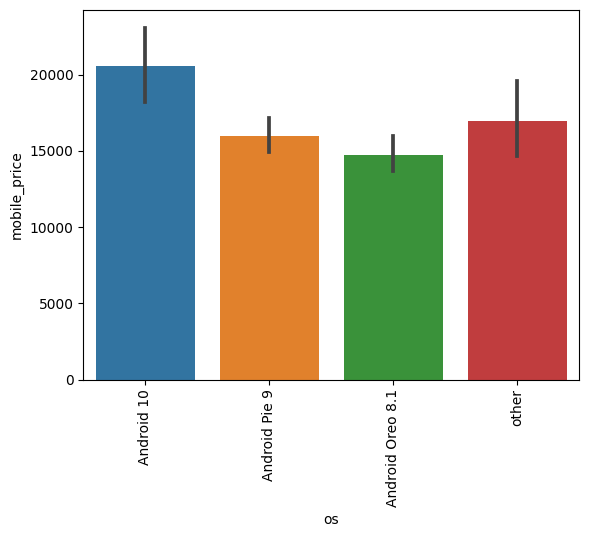

In [685]:
sns.barplot(x=df['os'],y=df['mobile_price'])
plt.xticks(rotation='vertical')
plt.show()


In [686]:
df.corr()['mobile_price']

<ipython-input-686-f1a7ef7ca649>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['mobile_price']


mobile_price    1.000000
disp_size       0.367067
res_dim_1       0.410193
res_dim_2       0.229511
Name: mobile_price, dtype: float64

In [687]:
df.head(1)

,mobile_price,mobile_color,dual_sim,disp_size,os,num_cores,mp_speed,int_memory,ram,p_cam,f_cam,network,bluetooth,battery_power,mob_width,mob_height,mob_depth,mob_weight,res_dim_1,res_dim_2
0,8999,Other,Dual Sim,6.52,Android 10,Octa Core,2 GHz,32 GB,3 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g,1600,720


In [688]:
df['num_cores'].value_counts()

Octa Core      391
Quad Core       11
Single Core      1
Name: num_cores, dtype: int64

In [689]:
df = df[df['num_cores']!='Single Core']

In [690]:
df['num_cores'].value_counts()

Octa Core    391
Quad Core     11
Name: num_cores, dtype: int64

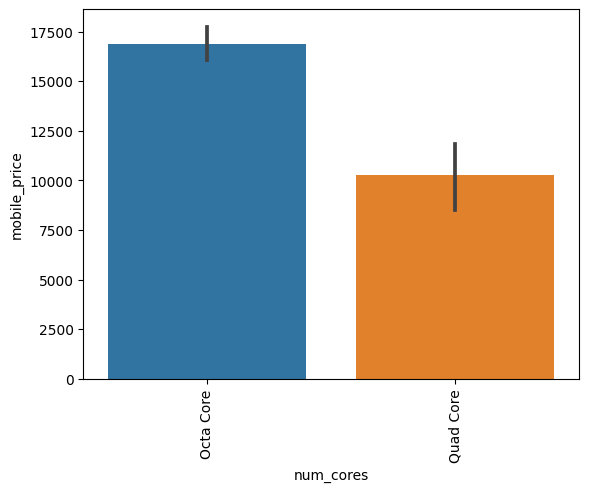

In [691]:
sns.barplot(x=df['num_cores'],y=df['mobile_price'])
plt.xticks(rotation='vertical')
plt.show()

In [692]:
df.head(1)

,mobile_price,mobile_color,dual_sim,disp_size,os,num_cores,mp_speed,int_memory,ram,p_cam,f_cam,network,bluetooth,battery_power,mob_width,mob_height,mob_depth,mob_weight,res_dim_1,res_dim_2
0,8999,Other,Dual Sim,6.52,Android 10,Octa Core,2 GHz,32 GB,3 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g,1600,720


In [693]:
df['mp_speed'].value_counts()

2 GHz        133
2.3 GHz       60
2.2 GHz       45
1.8 GHz       40
1.4 GHz       22
2.8 GHz       20
2.1 GHz       18
1.95 GHz      17
2.96 GHz      15
2.84 GHz      10
2.5 GHz        5
2.05 GHz       3
1.6 GHz        3
2.39 GHz       3
2.6 GHz        3
1.5 GHz        2
2.649 GHz      2
1.3 GHz        1
Name: mp_speed, dtype: int64

In [694]:
def mp_speed_preprocess(x):
  return x.split()[0]

In [695]:
df['mp_speed'] = df['mp_speed'].apply(lambda x:mp_speed_preprocess(x))

In [696]:
df['mp_speed'] = df['mp_speed'].astype('float32')

In [697]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 402 entries, 0 to 447
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mobile_price   402 non-null    int32  
 1   mobile_color   402 non-null    object 
 2   dual_sim       402 non-null    object 
 3   disp_size      402 non-null    float32
 4   os             402 non-null    object 
 5   num_cores      402 non-null    object 
 6   mp_speed       402 non-null    float32
 7   int_memory     402 non-null    object 
 8   ram            402 non-null    object 
 9   p_cam          402 non-null    object 
 10  f_cam          402 non-null    object 
 11  network        402 non-null    object 
 12  bluetooth      402 non-null    object 
 13  battery_power  402 non-null    object 
 14  mob_width      402 non-null    object 
 15  mob_height     402 non-null    object 
 16  mob_depth      402 non-null    object 
 17  mob_weight     402 non-null    object 
 18  res_dim_1 

<Axes: xlabel='mp_speed', ylabel='mobile_price'>

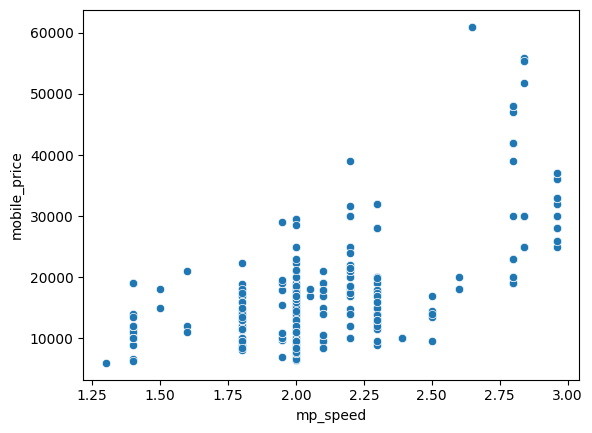

In [698]:
sns.scatterplot(x=df['mp_speed'],y=df['mobile_price'])

In [699]:
df.corr()['mobile_price']

<ipython-input-699-f1a7ef7ca649>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['mobile_price']


mobile_price    1.000000
disp_size       0.366649
mp_speed        0.606659
res_dim_1       0.409634
res_dim_2       0.230158
Name: mobile_price, dtype: float64

In [700]:
df.head(1)

,mobile_price,mobile_color,dual_sim,disp_size,os,num_cores,mp_speed,int_memory,ram,p_cam,f_cam,network,bluetooth,battery_power,mob_width,mob_height,mob_depth,mob_weight,res_dim_1,res_dim_2
0,8999,Other,Dual Sim,6.52,Android 10,Octa Core,2.0,32 GB,3 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g,1600,720


In [701]:
df['int_memory'].value_counts()

64 GB     157
128 GB    115
32 GB      82
256 GB     27
16 GB      18
512 GB      2
8 GB        1
Name: int_memory, dtype: int64

In [702]:
def int_memory_preprocess(x):
  return x.split()[0]

In [703]:
df['int_memory'] = df['int_memory'].apply(lambda x:int_memory_preprocess(x))

In [704]:
df['int_memory'].value_counts()

64     157
128    115
32      82
256     27
16      18
512      2
8        1
Name: int_memory, dtype: int64

In [705]:
df['int_memory'] = df['int_memory'].astype('int')

<Axes: xlabel='int_memory', ylabel='mobile_price'>

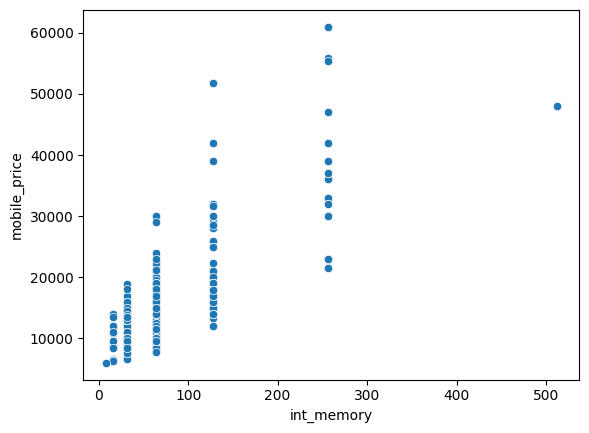

In [706]:
sns.scatterplot(x=df['int_memory'],y=df['mobile_price'])

In [707]:
df.corr()['mobile_price']

<ipython-input-707-f1a7ef7ca649>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['mobile_price']


mobile_price    1.000000
disp_size       0.366649
mp_speed        0.606659
int_memory      0.763881
res_dim_1       0.409634
res_dim_2       0.230158
Name: mobile_price, dtype: float64

In [708]:
df.head(1)

,mobile_price,mobile_color,dual_sim,disp_size,os,num_cores,mp_speed,int_memory,ram,p_cam,f_cam,network,bluetooth,battery_power,mob_width,mob_height,mob_depth,mob_weight,res_dim_1,res_dim_2
0,8999,Other,Dual Sim,6.52,Android 10,Octa Core,2.0,32,3 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g,1600,720


In [709]:
def universal(x):
  return x.split()[0]

# ram,battery,wid,hei,dep,wei

In [710]:
# df['ram'].value_counts()
df['ram'] = df['ram'].apply(lambda x:universal(x))
df['battery_power'] = df['battery_power'].apply(lambda x:universal(x))
df['mob_width'] = df['mob_width'].apply(lambda x:universal(x))
df['mob_height'] = df['mob_height'].apply(lambda x:universal(x))
df['mob_depth'] = df['mob_depth'].apply(lambda x:universal(x))
df['mob_weight'] = df['mob_weight'].apply(lambda x:universal(x))

In [711]:
# df['mob_weight'].value_counts()

In [712]:
df['ram'] = df['ram'].astype('int')
df['battery_power'] = df['battery_power'].astype('int')
df['mob_width'] = df['mob_width'].astype('float32')
df['mob_height'] = df['mob_height'].astype('float32')
df['mob_depth'] = df['mob_depth'].astype('float32')
df['mob_weight'] = df['mob_weight'].astype('float32')

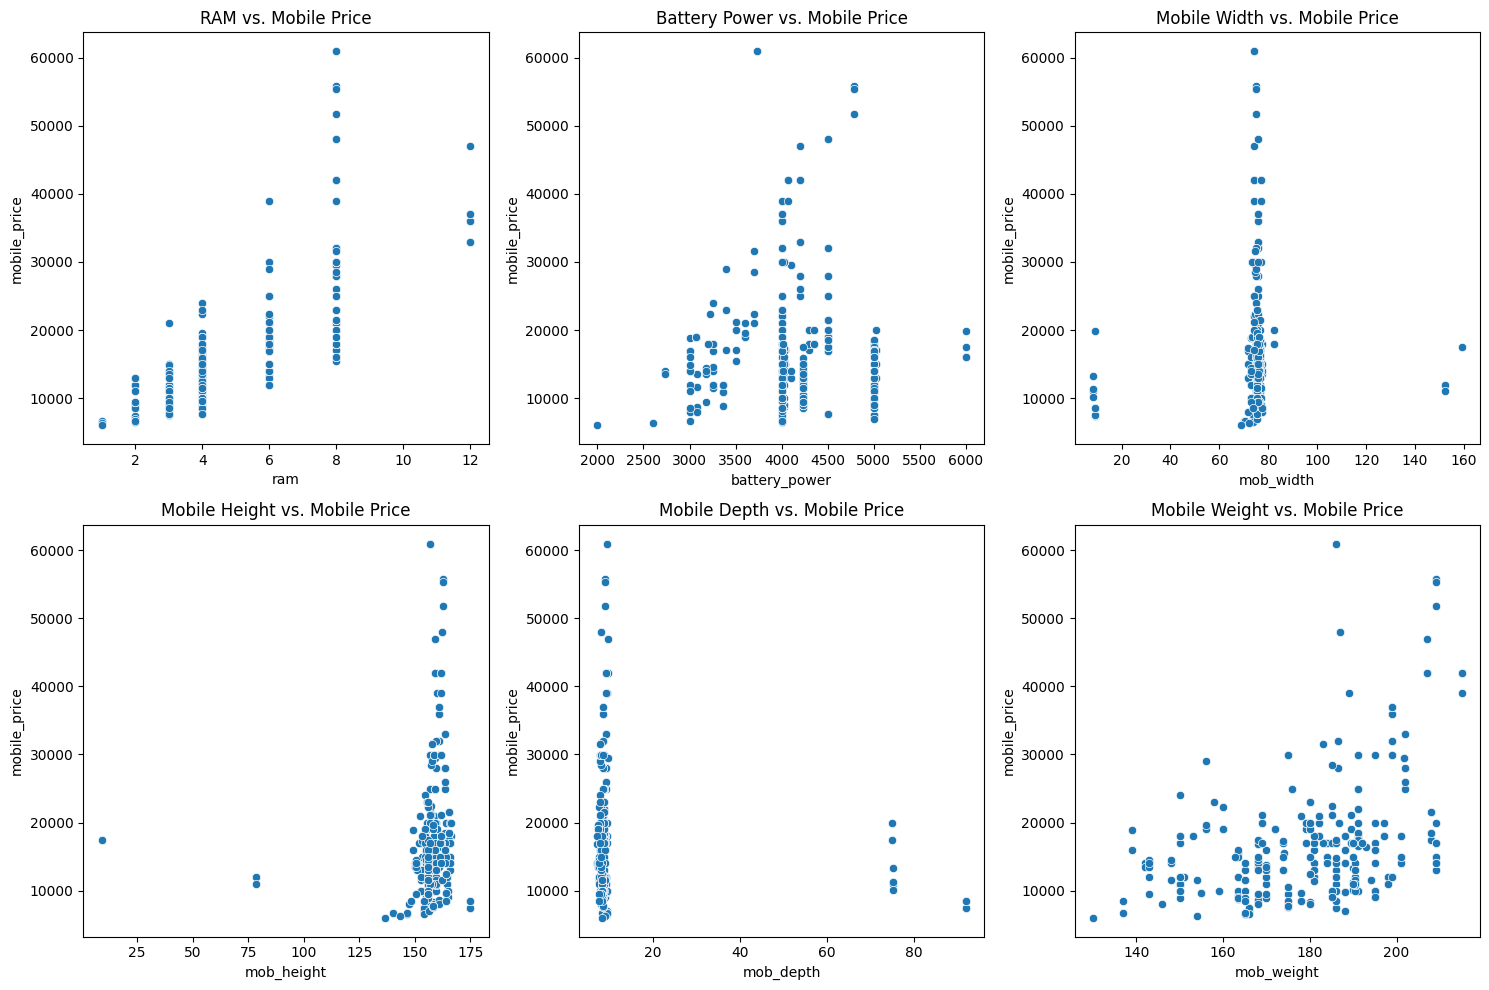

In [713]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Scatterplot 1
sns.scatterplot(x=df['ram'], y=df['mobile_price'], ax=axes[0, 0])
axes[0, 0].set_title('RAM vs. Mobile Price')

# Scatterplot 2
sns.scatterplot(x=df['battery_power'], y=df['mobile_price'], ax=axes[0, 1])
axes[0, 1].set_title('Battery Power vs. Mobile Price')

# Scatterplot 3
sns.scatterplot(x=df['mob_width'], y=df['mobile_price'], ax=axes[0, 2])
axes[0, 2].set_title('Mobile Width vs. Mobile Price')

# Scatterplot 4
sns.scatterplot(x=df['mob_height'], y=df['mobile_price'], ax=axes[1, 0])
axes[1, 0].set_title('Mobile Height vs. Mobile Price')

# Scatterplot 5
sns.scatterplot(x=df['mob_depth'], y=df['mobile_price'], ax=axes[1, 1])
axes[1, 1].set_title('Mobile Depth vs. Mobile Price')

# Scatterplot 6
sns.scatterplot(x=df['mob_weight'], y=df['mobile_price'], ax=axes[1, 2])
axes[1, 2].set_title('Mobile Weight vs. Mobile Price')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


In [714]:
df.corr()['mobile_price']

<ipython-input-714-f1a7ef7ca649>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['mobile_price']


mobile_price     1.000000
disp_size        0.366649
mp_speed         0.606659
int_memory       0.763881
ram              0.768121
battery_power   -0.012244
mob_width        0.095643
mob_height       0.087446
mob_depth       -0.118081
mob_weight       0.386041
res_dim_1        0.409634
res_dim_2        0.230158
Name: mobile_price, dtype: float64

# **As you can see that battery,depth and slighly widht and height are not**:

In [715]:
df.head(1)

,mobile_price,mobile_color,dual_sim,disp_size,os,num_cores,mp_speed,int_memory,ram,p_cam,f_cam,network,bluetooth,battery_power,mob_width,mob_height,mob_depth,mob_weight,res_dim_1,res_dim_2
0,8999,Other,Dual Sim,6.52,Android 10,Octa Core,2.0,32,3,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000,75.0,164.399994,8.95,195.0,1600,720


In [716]:
df['p_cam'].value_counts()

13MP + 2MP                                                                                      60
13MP Rear Camera                                                                                40
12MP + 5MP                                                                                      34
48MP + 8MP + 2MP + 2MP                                                                          32
64MP + 8MP + 2MP + 2MP                                                                          20
48MP + 13MP + 8MP                                                                               17
48MP + 5MP                                                                                      17
48MP + 8MP + 5MP + 2MP                                                                          16
12MP Rear Camera                                                                                11
12MP + 2MP                                                                                      11
64MP + 13M

In [717]:
df['p_cam_max']=[x[0:2].replace('M','') for x in df['p_cam']]
df['p_cam_count'] = [x.count('MP') for x in df['p_cam']]

In [718]:
df.head(1)

,mobile_price,mobile_color,dual_sim,disp_size,os,num_cores,mp_speed,int_memory,ram,p_cam,...,bluetooth,battery_power,mob_width,mob_height,mob_depth,mob_weight,res_dim_1,res_dim_2,p_cam_max,p_cam_count
0,8999,Other,Dual Sim,6.52,Android 10,Octa Core,2.0,32,3,12MP + 2MP + 2MP,...,Yes,5000,75.0,164.399994,8.95,195.0,1600,720,12,3


In [719]:
df.drop('p_cam',axis=1,inplace=True)

In [720]:
df.head(1)

,mobile_price,mobile_color,dual_sim,disp_size,os,num_cores,mp_speed,int_memory,ram,f_cam,...,bluetooth,battery_power,mob_width,mob_height,mob_depth,mob_weight,res_dim_1,res_dim_2,p_cam_max,p_cam_count
0,8999,Other,Dual Sim,6.52,Android 10,Octa Core,2.0,32,3,5MP Front Camera,...,Yes,5000,75.0,164.399994,8.95,195.0,1600,720,12,3


In [721]:
df['p_cam_max'] = df['p_cam_max'].astype('int')
df['p_cam_count'] = df['p_cam_count'].astype('int')

In [722]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 402 entries, 0 to 447
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mobile_price   402 non-null    int32  
 1   mobile_color   402 non-null    object 
 2   dual_sim       402 non-null    object 
 3   disp_size      402 non-null    float32
 4   os             402 non-null    object 
 5   num_cores      402 non-null    object 
 6   mp_speed       402 non-null    float32
 7   int_memory     402 non-null    int64  
 8   ram            402 non-null    int64  
 9   f_cam          402 non-null    object 
 10  network        402 non-null    object 
 11  bluetooth      402 non-null    object 
 12  battery_power  402 non-null    int64  
 13  mob_width      402 non-null    float32
 14  mob_height     402 non-null    float32
 15  mob_depth      402 non-null    float32
 16  mob_weight     402 non-null    float32
 17  res_dim_1      402 non-null    int64  
 18  res_dim_2 

In [723]:
df.drop('bluetooth',axis=1,inplace=True)

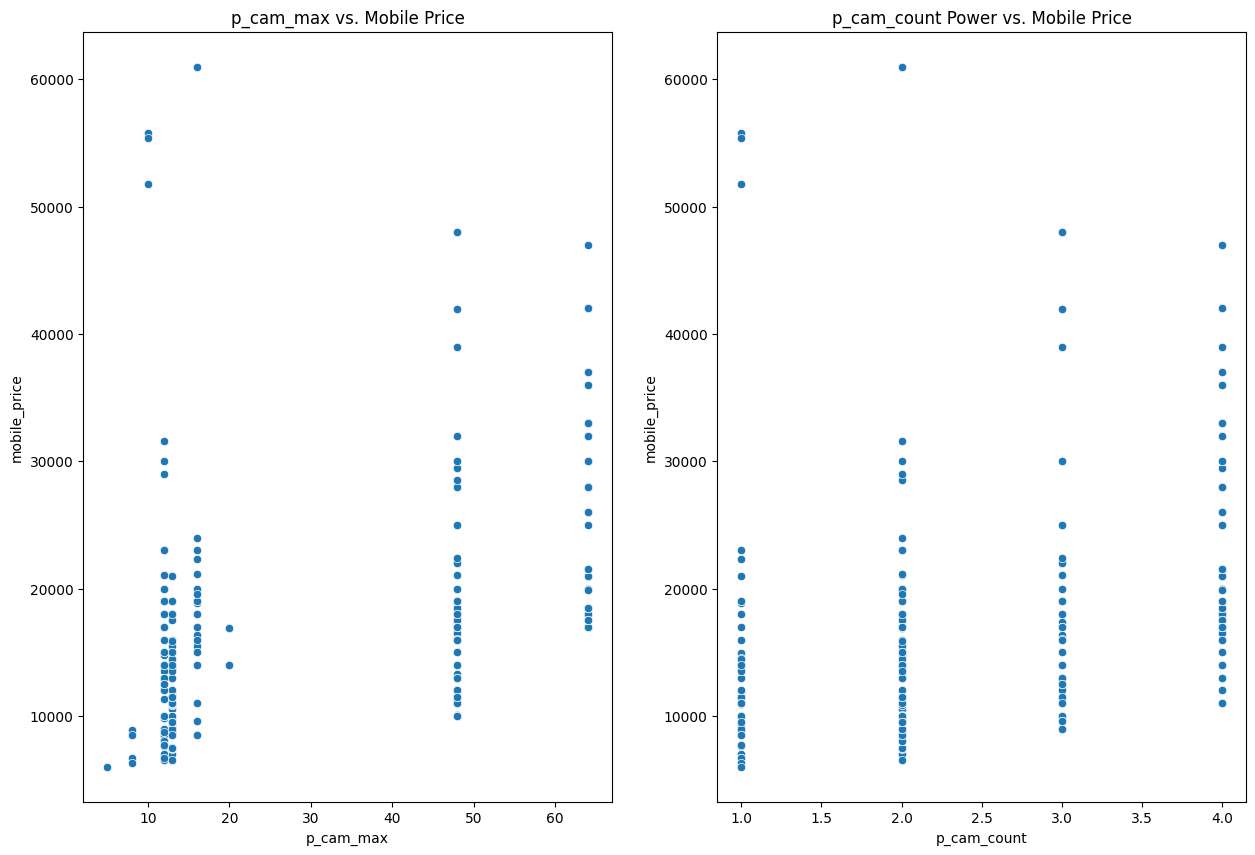

In [724]:
fig, axes = plt.subplots(1, 2, figsize=(15, 10))

# Scatterplot 1
sns.scatterplot(x=df['p_cam_max'], y=df['mobile_price'], ax=axes[0])
axes[0].set_title('p_cam_max vs. Mobile Price')

# Scatterplot 2
sns.scatterplot(x=df['p_cam_count'], y=df['mobile_price'], ax=axes[1])
axes[1].set_title('p_cam_count Power vs. Mobile Price')

plt.show()

In [725]:
df.corr()['mobile_price']

<ipython-input-725-f1a7ef7ca649>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['mobile_price']


mobile_price     1.000000
disp_size        0.366649
mp_speed         0.606659
int_memory       0.763881
ram              0.768121
battery_power   -0.012244
mob_width        0.095643
mob_height       0.087446
mob_depth       -0.118081
mob_weight       0.386041
res_dim_1        0.409634
res_dim_2        0.230158
p_cam_max        0.424421
p_cam_count      0.344360
Name: mobile_price, dtype: float64

In [726]:
df.head(1)

,mobile_price,mobile_color,dual_sim,disp_size,os,num_cores,mp_speed,int_memory,ram,f_cam,network,battery_power,mob_width,mob_height,mob_depth,mob_weight,res_dim_1,res_dim_2,p_cam_max,p_cam_count
0,8999,Other,Dual Sim,6.52,Android 10,Octa Core,2.0,32,3,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",5000,75.0,164.399994,8.95,195.0,1600,720,12,3


In [727]:
df['f_cam'].value_counts()

16MP Front Camera               99
20MP Front Camera               53
8MP Front Camera                51
32MP Front Camera               50
5MP Front Camera                49
13MP Front Camera               39
20MP + 2MP Dual Front Camera    14
32MP + 8MP Dual Front Camera    13
25MP Front Camera               11
16MP + 8MP Dual Front Camera     6
8MP Dual Front Camera            6
24MP Front Camera                4
13MP + 2MP Dual Front Camera     3
44MP + 2MP Dual Front Camera     3
2MP Front Camera                 1
Name: f_cam, dtype: int64

In [728]:
df['f_cam_max']=[x[0:2].replace('M','') for x in df['f_cam']]
df['f_cam_count'] = [x.count('MP') for x in df['f_cam']]

In [729]:
df['f_cam_max'] = df['f_cam_max'].astype('int')
df['f_cam_count'] = df['f_cam_count'].astype('int')

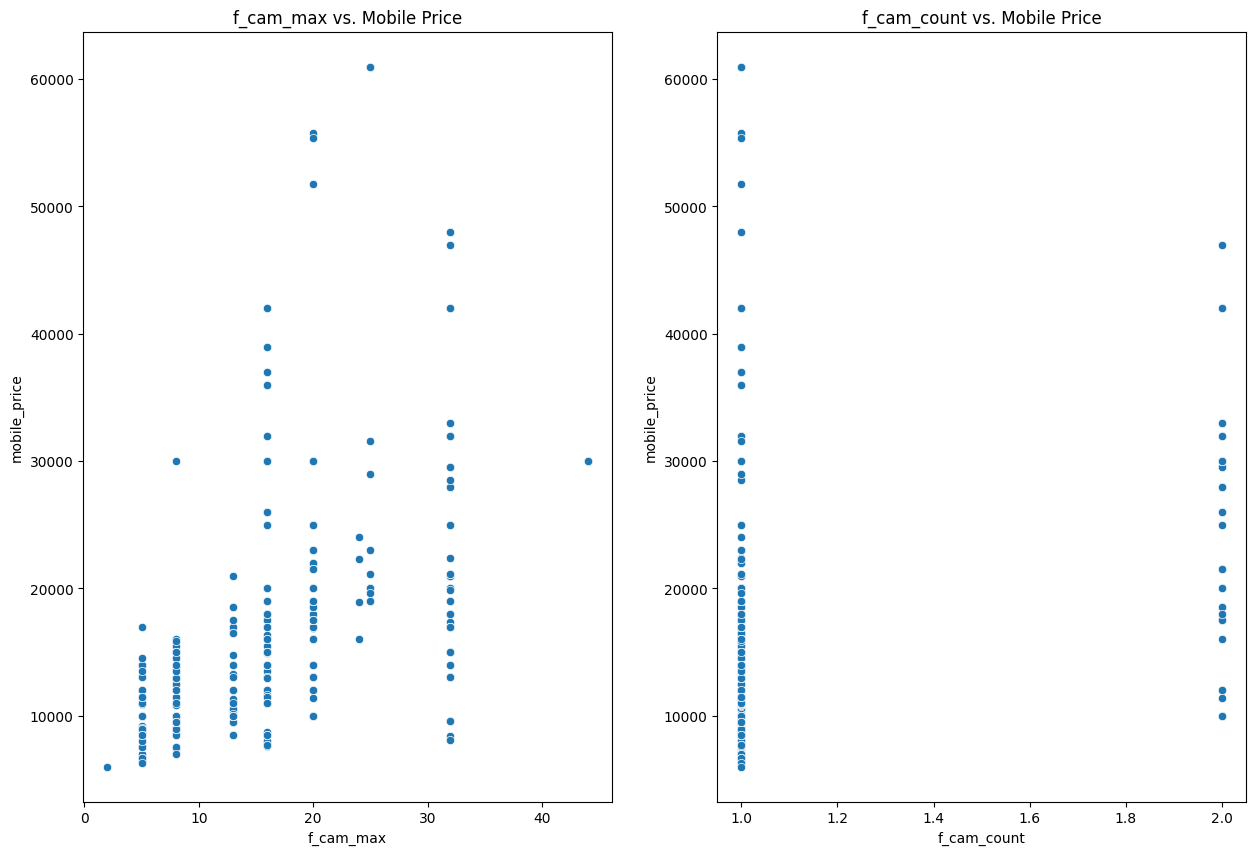

In [730]:
fig, axes = plt.subplots(1, 2, figsize=(15, 10))

# Scatterplot 1
sns.scatterplot(x=df['f_cam_max'], y=df['mobile_price'], ax=axes[0])
axes[0].set_title('f_cam_max vs. Mobile Price')

# Scatterplot 2
sns.scatterplot(x=df['f_cam_count'], y=df['mobile_price'], ax=axes[1])
axes[1].set_title('f_cam_count vs. Mobile Price')

plt.show()

In [731]:
df.corr()['mobile_price']

<ipython-input-731-f1a7ef7ca649>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['mobile_price']


mobile_price     1.000000
disp_size        0.366649
mp_speed         0.606659
int_memory       0.763881
ram              0.768121
battery_power   -0.012244
mob_width        0.095643
mob_height       0.087446
mob_depth       -0.118081
mob_weight       0.386041
res_dim_1        0.409634
res_dim_2        0.230158
p_cam_max        0.424421
p_cam_count      0.344360
f_cam_max        0.485887
f_cam_count      0.261053
Name: mobile_price, dtype: float64

In [732]:
df.drop(['f_cam'],axis=1,inplace=True)

In [733]:
df.head(1)

,mobile_price,mobile_color,dual_sim,disp_size,os,num_cores,mp_speed,int_memory,ram,network,...,mob_width,mob_height,mob_depth,mob_weight,res_dim_1,res_dim_2,p_cam_max,p_cam_count,f_cam_max,f_cam_count
0,8999,Other,Dual Sim,6.52,Android 10,Octa Core,2.0,32,3,"4G VOLTE, 4G, 3G, 2G",...,75.0,164.399994,8.95,195.0,1600,720,12,3,5,1


In [734]:
df['network'].value_counts()

3G, 4G VOLTE, 4G, 2G        109
3G, 4G VOLTE, 2G             79
4G VOLTE, 4G, 3G, 2G         74
3G, 4G, 2G                   34
4G, 3G, 2G                   26
4G VOLTE, 4G, 2G, 3G         17
4G VOLTE, 3G, 2G             13
4G VOLTE, 3G                 10
3G, 4G VOLTE, 4G              9
3G, 4G VOLTE                  8
4G VOLTE                      7
5G, 4G VOLTE, 4G, 3G, 2G      3
4G VOLTE, 5G                  3
4G, 2G, 3G                    3
4G VOLTE, 4G                  3
2G                            2
3G, 4G                        2
Name: network, dtype: int64

In [735]:
df['network']=df['network'].str.replace(' ','')

In [736]:
df['network']=df['network'].apply(lambda x: sorted(x.split(',')))

In [737]:
df['network'].value_counts()

[2G, 3G, 4G, 4GVOLTE]        200
[2G, 3G, 4GVOLTE]             92
[2G, 3G, 4G]                  63
[3G, 4GVOLTE]                 18
[3G, 4G, 4GVOLTE]              9
[4GVOLTE]                      7
[2G, 3G, 4G, 4GVOLTE, 5G]      3
[4GVOLTE, 5G]                  3
[4G, 4GVOLTE]                  3
[2G]                           2
[3G, 4G]                       2
Name: network, dtype: int64

In [738]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb=MultiLabelBinarizer()
dg=pd.DataFrame(mlb.fit_transform(df['network']),columns=mlb.classes_,index=df.index)

In [739]:
dg.head(3)

,2G,3G,4G,4GVOLTE,5G
0,1,1,1,1,0
1,1,1,1,1,0
2,1,1,1,1,0


In [740]:
df=pd.merge(df,dg,left_index=True,right_index=True)

In [741]:
df.drop('network',axis=1,inplace=True)

In [742]:
df.head(3)

,mobile_price,mobile_color,dual_sim,disp_size,os,num_cores,mp_speed,int_memory,ram,battery_power,...,res_dim_2,p_cam_max,p_cam_count,f_cam_max,f_cam_count,2G,3G,4G,4GVOLTE,5G
0,8999,Other,Dual Sim,6.52,Android 10,Octa Core,2.0,32,3,5000,...,720,12,3,5,1,1,1,1,1,0
1,8999,Blue,Dual Sim,6.52,Android 10,Octa Core,2.0,32,3,5000,...,720,12,3,5,1,1,1,1,1,0
2,9999,Blue,Dual Sim,6.52,Android 10,Octa Core,2.0,64,4,5000,...,720,12,3,5,1,1,1,1,1,0


In [743]:
df.columns

Index(['mobile_price', 'mobile_color', 'dual_sim', 'disp_size', 'os',
       'num_cores', 'mp_speed', 'int_memory', 'ram', 'battery_power',
       'mob_width', 'mob_height', 'mob_depth', 'mob_weight', 'res_dim_1',
       'res_dim_2', 'p_cam_max', 'p_cam_count', 'f_cam_max', 'f_cam_count',
       '2G', '3G', '4G', '4GVOLTE', '5G'],
      dtype='object')

In [744]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 402 entries, 0 to 447
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mobile_price   402 non-null    int32  
 1   mobile_color   402 non-null    object 
 2   dual_sim       402 non-null    object 
 3   disp_size      402 non-null    float32
 4   os             402 non-null    object 
 5   num_cores      402 non-null    object 
 6   mp_speed       402 non-null    float32
 7   int_memory     402 non-null    int64  
 8   ram            402 non-null    int64  
 9   battery_power  402 non-null    int64  
 10  mob_width      402 non-null    float32
 11  mob_height     402 non-null    float32
 12  mob_depth      402 non-null    float32
 13  mob_weight     402 non-null    float32
 14  res_dim_1      402 non-null    int64  
 15  res_dim_2      402 non-null    int64  
 16  p_cam_max      402 non-null    int64  
 17  p_cam_count    402 non-null    int64  
 18  f_cam_max 

In [745]:
df['num_cores']=df['num_cores'].map({'Octa Core':8,'Quad Core':4,'Single Core':1})

In [746]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 402 entries, 0 to 447
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mobile_price   402 non-null    int32  
 1   mobile_color   402 non-null    object 
 2   dual_sim       402 non-null    object 
 3   disp_size      402 non-null    float32
 4   os             402 non-null    object 
 5   num_cores      402 non-null    int64  
 6   mp_speed       402 non-null    float32
 7   int_memory     402 non-null    int64  
 8   ram            402 non-null    int64  
 9   battery_power  402 non-null    int64  
 10  mob_width      402 non-null    float32
 11  mob_height     402 non-null    float32
 12  mob_depth      402 non-null    float32
 13  mob_weight     402 non-null    float32
 14  res_dim_1      402 non-null    int64  
 15  res_dim_2      402 non-null    int64  
 16  p_cam_max      402 non-null    int64  
 17  p_cam_count    402 non-null    int64  
 18  f_cam_max 

# **Finally, Our Dataset is Ready**

In [747]:
df.head()

,mobile_price,mobile_color,dual_sim,disp_size,os,num_cores,mp_speed,int_memory,ram,battery_power,...,res_dim_2,p_cam_max,p_cam_count,f_cam_max,f_cam_count,2G,3G,4G,4GVOLTE,5G
0,8999,Other,Dual Sim,6.52,Android 10,8,2.0,32,3,5000,...,720,12,3,5,1,1,1,1,1,0
1,8999,Blue,Dual Sim,6.52,Android 10,8,2.0,32,3,5000,...,720,12,3,5,1,1,1,1,1,0
2,9999,Blue,Dual Sim,6.52,Android 10,8,2.0,64,4,5000,...,720,12,3,5,1,1,1,1,1,0
3,9999,Other,Dual Sim,6.52,Android 10,8,2.0,64,4,5000,...,720,12,3,5,1,1,1,1,1,0
4,11999,Other,Dual Sim,6.50,Android 10,8,2.0,128,4,5000,...,720,48,4,16,1,1,1,1,1,0


In [748]:
df.to_csv('Preprocessed_dataset_Mobile.csv', index=False)

In [749]:
df.shape

(402, 25)